In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

In [3]:
# taking dummy data here, to be replaced by fetched data from backend
tickers = ["NFLX", "GOOGL", "MSFT", "AMZN", "META"]

In [4]:
# Downloading stocks 
stocks = yf.download(tickers, start = "2020-03-01", end = "2023-11-01")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


In [6]:
stocks.to_csv("ai_companies_stocks.csv")
ai_stocks = pd.read_csv("ai_companies_stocks.csv", header=[0,1], index_col=[0], parse_dates=[0])

In [7]:
close = ai_stocks.loc[:, "Close"].copy()


<function matplotlib.pyplot.show(close=None, block=None)>

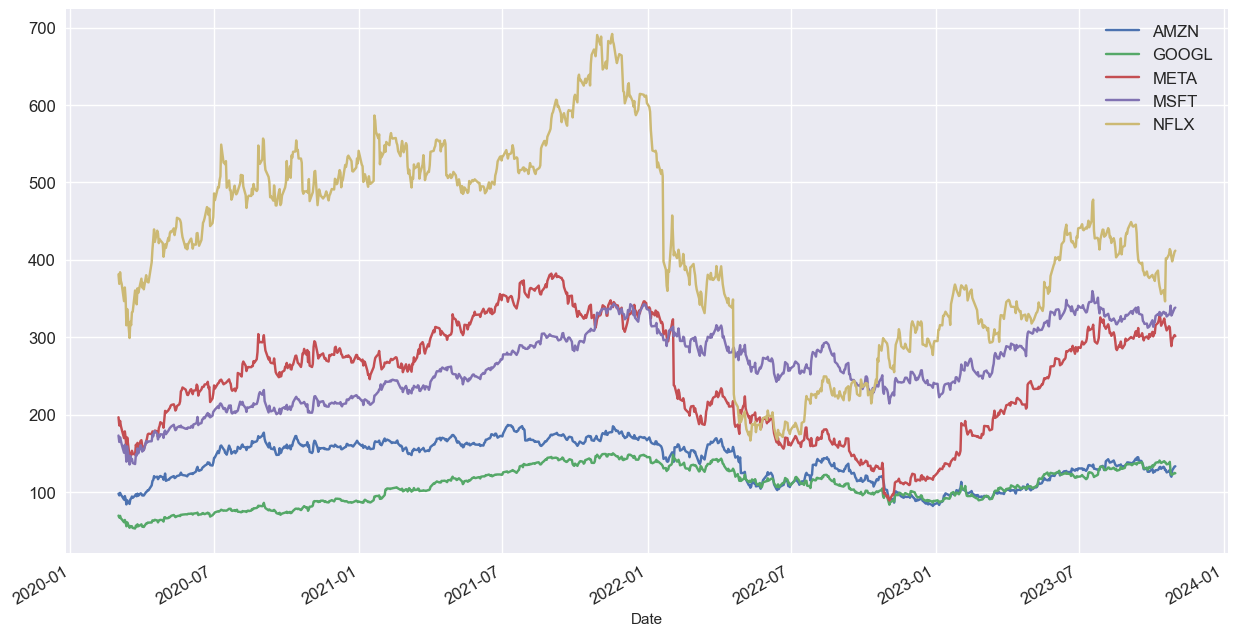

In [22]:
# Plotting the close graph
close.plot(figsize=[15,8], fontsize= 12)
plt.legend(fontsize= 12)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

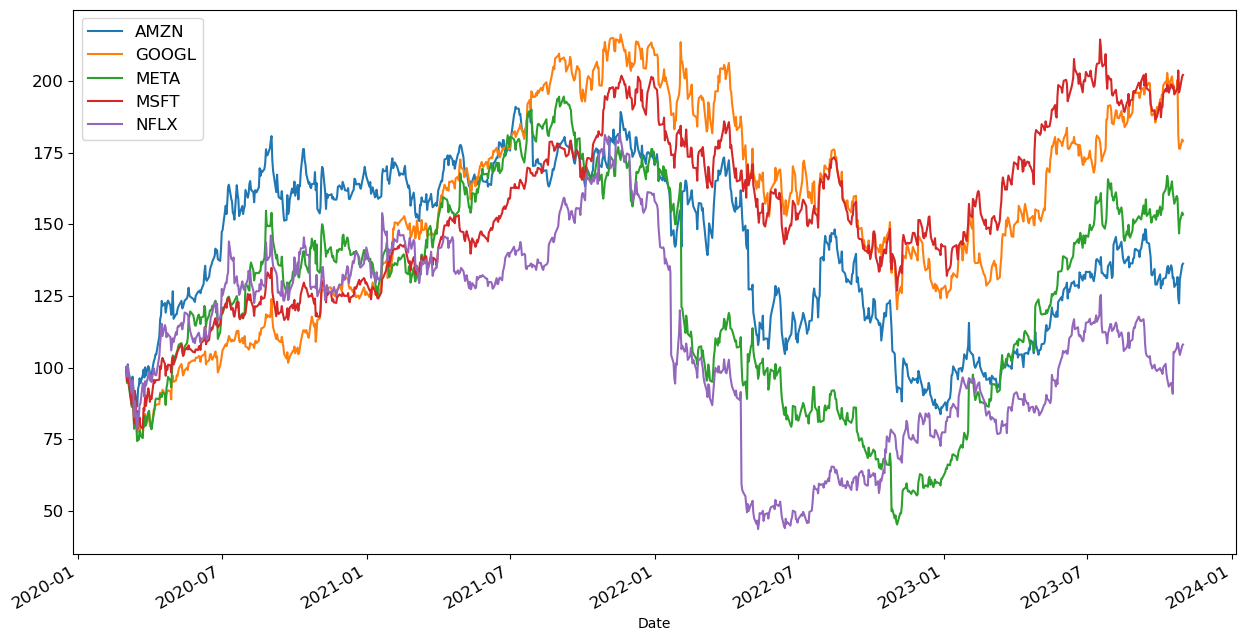

In [9]:
# Plotting the close graph
normalized_close = close.div(close.iloc[0]).mul(100)
normalized_close.plot(figsize=[15,8], fontsize= 12)
plt.legend(fontsize= 12)
plt.show

In [11]:
close_returns =  close.pct_change().dropna()
stocks_summary = close_returns.describe().T.loc[:, ["mean", "std"]]
stocks_summary["mean" ] = stocks_summary["mean"]*260
stocks_summary["std" ] = stocks_summary["std"]*np.sqrt(260)

<function matplotlib.pyplot.show(close=None, block=None)>

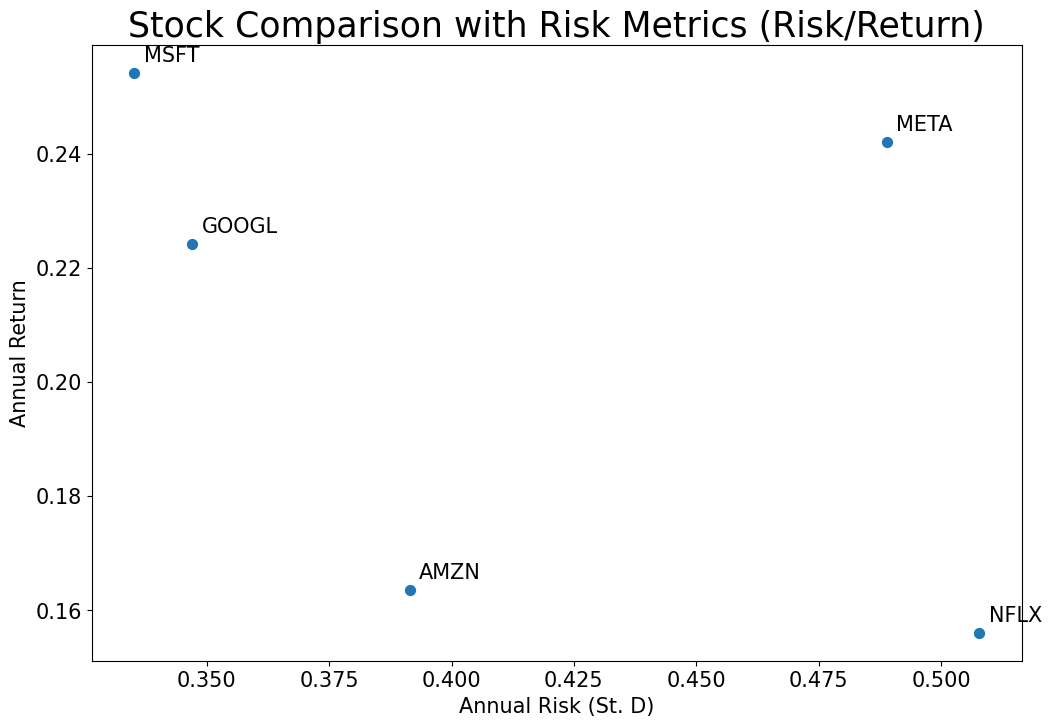

In [12]:
# Plotting scatter plot using the data from the "stocks_summary" DataFrame.
stocks_summary.plot.scatter(x = "std", y = "mean", figsize = (12,8), s = 50, fontsize = 15)

for i in stocks_summary.index:
    plt.annotate(i, xy = (stocks_summary.loc[i, "std"]+0.002, stocks_summary.loc[i, "mean"]+0.002), size = 15)
    
plt.xlabel("Annual Risk (St. D)", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Stock Comparison with Risk Metrics (Risk/Return)", fontsize = 25)
plt.show

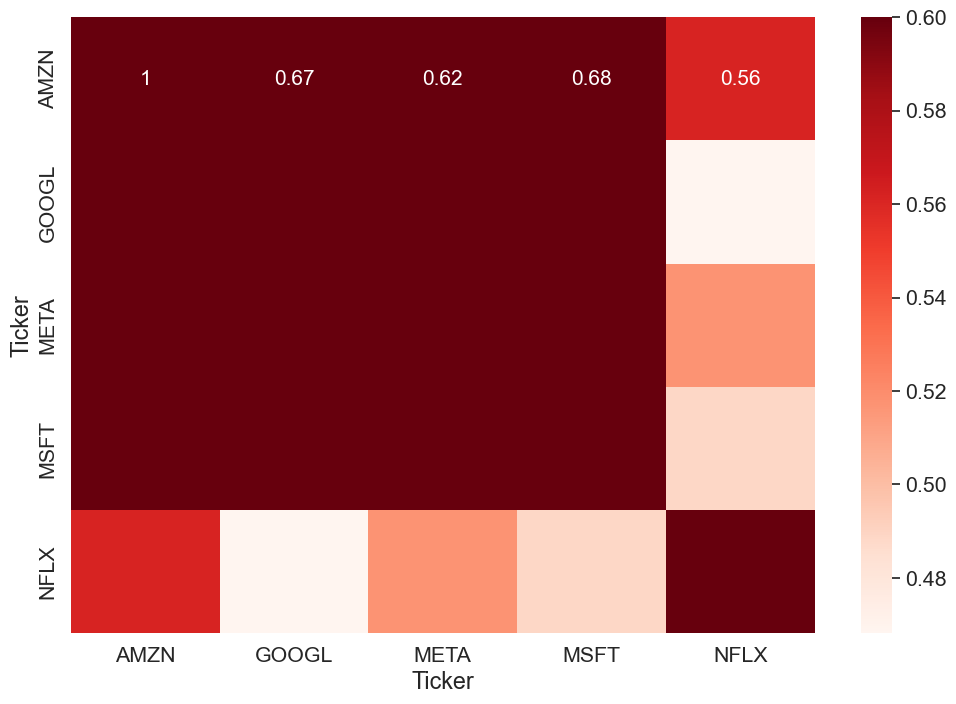

In [13]:
close_returns.corr()
import seaborn as sns
plt.figure(figsize=(12,8))
sns.set(font_scale = 1.4)
sns.heatmap(close_returns.corr(), cmap= "Reds", annot= True, annot_kws={"size":15}, vmax = 0.6)
plt.show()